In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
import math
from sklearn import neighbors
from math import sqrt
from sklearn.tree import DecisionTreeRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [2]:
train_data = pd.read_csv('PRSA_Data_Aot.csv')

In [3]:
train_data

,No,year,month,day,hour,PM25,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35059,35060,2017,2,28,19,12.0,29.0,5.0,35.0,400.0,95.0,12.5,1013.5,-16.2,0.0,NW,2.4,Aotizhongxin
35060,35061,2017,2,28,20,13.0,37.0,7.0,45.0,500.0,81.0,11.6,1013.6,-15.1,0.0,WNW,0.9,Aotizhongxin
35061,35062,2017,2,28,21,16.0,37.0,10.0,66.0,700.0,58.0,10.8,1014.2,-13.3,0.0,NW,1.1,Aotizhongxin
35062,35063,2017,2,28,22,21.0,44.0,12.0,87.0,700.0,35.0,10.5,1014.4,-12.9,0.0,NNW,1.2,Aotizhongxin


In [4]:
print(train_data.isnull().sum())

No            0
year          0
month         0
day           0
hour          0
PM25        925
PM10        718
SO2         935
NO2        1023
CO         1776
O3         1719
TEMP         20
PRES         20
DEWP         20
RAIN         20
wd           81
WSPM         14
station       0
dtype: int64


In [5]:
train_data['year']=train_data['year'].fillna(train_data['year'].mean())
train_data['month']=train_data['month'].fillna(train_data['month'].mean())
train_data['day']=train_data['day'].fillna(train_data['day'].mean())
train_data['hour']=train_data['hour'].fillna(train_data['hour'].mean())
train_data['PM25']=train_data['PM25'].fillna(train_data['PM25'].mean())
train_data['PM10']=train_data['PM10'].fillna(train_data['PM10'].mean())
train_data['SO2']=train_data['SO2'].fillna(train_data['SO2'].mean())
train_data['NO2']=train_data['NO2'].fillna(train_data['NO2'].mean())
train_data['O3']=train_data['O3'].fillna(train_data['O3'].mean())
train_data['CO']=train_data['O3'].fillna(train_data['CO'].mean())

In [6]:
print(train_data.isnull().sum())

No          0
year        0
month       0
day         0
hour        0
PM25        0
PM10        0
SO2         0
NO2         0
CO          0
O3          0
TEMP       20
PRES       20
DEWP       20
RAIN       20
wd         81
WSPM       14
station     0
dtype: int64


In [7]:
X = train_data[['year','month','day','hour','PM25','PM10','SO2','NO2','O3']]
y = train_data.CO.values.reshape(-1, 1)

In [8]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y)

In [9]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X, y)

C:\Users\mehafus  shaik\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


SVR()

In [10]:
test_data = pd.read_csv('testingdata.csv')

In [11]:
test_data

,No,year,month,day,hour,PM25,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,76,2013,3,4,3,12,34,6.0000,12.0000,NaN,77.0000,7.2,1016.9,-11.6,0.0,N,2.8,Aotizhongxin
1,125,2013,3,6,4,192,203,83.6808,140.4252,NaN,22.0000,3.9,1007.3,-6.1,0.0,NE,1.4,Aotizhongxin
2,172,2013,3,8,3,324,373,71.0000,154.0000,NaN,84.0000,1.8,997.9,-1.8,0.0,N,0.0,Aotizhongxin
3,179,2013,3,8,10,326,844,125.9496,179.2269,NaN,84.0000,19.1,1000.9,-0.4,0.0,SSW,1.9,Aotizhongxin
4,268,2013,3,12,3,117,127,73.0000,81.0000,NaN,47.0000,6.4,1005.8,-1.0,0.1,N,2.2,Aotizhongxin
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69,588,2013,3,25,11,110,136,89.0000,88.0000,NaN,21.6342,7.8,1016.8,-5.0,0.0,ESE,1.9,Aotizhongxin
70,589,2013,3,25,12,111,124,73.0000,85.0000,NaN,32.7726,9.2,1015.5,-5.5,0.0,SSE,2.3,Aotizhongxin
71,590,2013,3,25,13,119,142,69.0000,100.0000,NaN,32.9868,10.0,1014.5,-5.6,0.0,S,3.1,Aotizhongxin
72,591,2013,3,25,14,124,168,60.0000,102.0000,NaN,43.2684,10.6,1013.5,-5.4,0.0,SW,1.9,Aotizhongxin


In [12]:
test_data['year']=test_data['year'].fillna(test_data['year'].mean())
test_data['month']=test_data['month'].fillna(test_data['month'].mean())
test_data['day']=test_data['day'].fillna(test_data['day'].mean())
test_data['hour']=test_data['hour'].fillna(test_data['hour'].mean())
test_data['PM25']=test_data['PM25'].fillna(test_data['PM25'].mean())
test_data['PM10']=test_data['PM10'].fillna(test_data['PM10'].mean())
test_data['SO2']=test_data['SO2'].fillna(test_data['SO2'].mean())
test_data['NO2']=test_data['NO2'].fillna(test_data['NO2'].mean())
test_data['O3']=test_data['O3'].fillna(test_data['O3'].mean())

In [13]:
test_data = test_data[['year','month','day','hour','PM25','PM10','SO2','NO2','O3']]
sc_test = StandardScaler()
test_data = sc_test.fit_transform(test_data)

In [14]:
y_pred = regressor.predict(test_data)
y_pred = y_pred.reshape(-1, 1)
y_pred = sc_y.inverse_transform(y_pred) 

In [15]:
print(y_pred)

[[ 97.00438741]
 [ 33.5531405 ]
 [105.41757745]
 [ 72.05272446]
 [ 66.77136784]
 [ 62.00874145]
 [ 53.43867899]
 [ 53.41663615]
 [-10.91256644]
 [-12.80326483]
 [-18.44995971]
 [-12.55659069]
 [  0.73625588]
 [ 55.73827884]
 [-23.96082722]
 [-24.50192104]
 [-24.20755713]
 [-24.22332163]
 [-25.05251602]
 [-27.71353355]
 [-14.12784856]
 [  0.21212302]
 [ 10.70643725]
 [ 15.29062959]
 [ 17.42425483]
 [ 21.83386005]
 [ 26.20105031]
 [ 79.92476402]
 [132.42929276]
 [121.98913514]
 [127.85485741]
 [136.72379294]
 [135.05914238]
 [129.5694143 ]
 [133.48043398]
 [ 94.96493498]
 [ 85.23614226]
 [ 67.89588812]
 [ 55.41811817]
 [ 43.12361942]
 [ 19.80099747]
 [ 50.08025145]
 [ 65.02270675]
 [ 91.91299194]
 [117.92962312]
 [124.88220702]
 [127.01524939]
 [137.83293779]
 [141.96669122]
 [148.21283212]
 [148.07402041]
 [131.01880231]
 [103.35315087]
 [ 75.18829338]
 [ 43.89275508]
 [ 19.98378939]
 [  2.57723695]
 [ 12.27987354]
 [-18.59350979]
 [-29.16924444]
 [ 56.46751621]
 [ 56.62872704]
 [ 56.78

In [16]:
y_pred1 = regressor.predict(X)
y_pred1 = y_pred1.reshape(-1, 1)
y_pred1 = sc_y.inverse_transform(y_pred1)
y1 = sc_y.inverse_transform(y)

In [17]:
def line_plot(line1, line2, label1=None, label2=None, title='', lw=2):
    fig, ax = plt.subplots(1, figsize=(13, 7))
    ax.plot(line1, label=label1, linewidth=lw)
    ax.plot(line2, label=label2, linewidth=lw)
    ax.set_ylabel('SoC', fontsize=14)
    ax.set_title(title, fontsize=16)
    ax.legend(loc='best', fontsize=16);

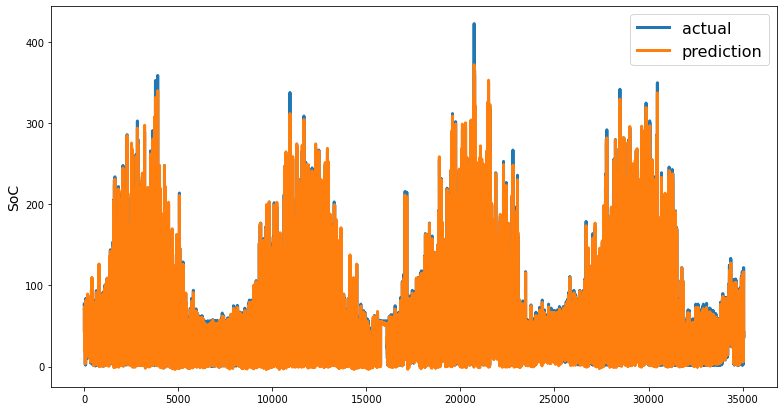

In [18]:
line_plot(y1, y_pred1, 'actual', 'prediction', lw=3)

In [19]:
print("Mean Absolute Error:\n")
print(mean_absolute_error(y_pred1, y1))

Mean Absolute Error:

2.354467738024778


In [20]:
MSE = mean_squared_error(y_pred1, y1)
print("Mean Squared Error:\n")
print(MSE)
RMSE = math.sqrt(MSE)
print("Root Mean Square Error:\n")
print(RMSE)
r2 = r2_score(y_pred1, y1)
print('r2 score for this model is', r2)

Mean Squared Error:

7.998349437441508
Root Mean Square Error:

2.8281353287000797
r2 score for this model is 0.9975282875849417


In [ ]:
rmse_val = [] #to store rmse values for different k
for K in range(20):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)

    model.fit(X, y)  #fit the model
    pred=model.predict(X) #make prediction on test set
    pred = sc_y.inverse_transform(pred)
    pred1=model.predict(test_data)
    pred1 = pred1.reshape(-1, 1)
    pred1 = sc_y.inverse_transform(pred1) 
    print(pred1)
    MSE=mean_squared_error(y1,pred)
    print("Mean Squared Error:\n")
    print(MSE)
    error = sqrt(mean_squared_error(y1,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)
    print("Mean Absolute Error: ")
    print(mean_absolute_error(pred, y1))
    r2 = r2_score(pred, y1)
    print('r2 score for this model is', r2)

[[130.        ]
 [ 56.35335841]
 [ 56.35335841]
 [ 84.        ]
 [ 56.35335841]
 [ 32.        ]
 [ 63.        ]
 [ 56.35335841]
 [  8.        ]
 [  8.        ]
 [  8.        ]
 [  2.        ]
 [ 36.        ]
 [ 61.        ]
 [  2.        ]
 [  2.        ]
 [  2.        ]
 [  6.        ]
 [  6.        ]
 [  8.        ]
 [ 15.        ]
 [ 22.        ]
 [ 22.        ]
 [ 28.        ]
 [ 28.        ]
 [ 57.        ]
 [ 42.        ]
 [103.        ]
 [118.        ]
 [112.        ]
 [131.        ]
 [161.        ]
 [161.        ]
 [131.        ]
 [109.        ]
 [ 87.        ]
 [ 83.        ]
 [ 65.        ]
 [ 56.35335841]
 [ 40.        ]
 [ 29.        ]
 [ 61.        ]
 [ 61.        ]
 [ 92.        ]
 [132.        ]
 [132.        ]
 [118.        ]
 [118.        ]
 [120.        ]
 [130.        ]
 [130.        ]
 [130.        ]
 [ 75.        ]
 [ 93.        ]
 [ 58.        ]
 [ 38.        ]
 [  2.        ]
 [  2.        ]
 [  2.        ]
 [  4.        ]
 [ 48.        ]
 [ 48.        ]
 [ 48.  

[[126.375     ]
 [ 18.7133396 ]
 [ 72.3383396 ]
 [ 35.4191698 ]
 [ 50.67667921]
 [ 43.8383396 ]
 [ 57.2575094 ]
 [ 54.0075094 ]
 [ 10.875     ]
 [ 12.5       ]
 [  8.5       ]
 [ 14.5       ]
 [ 30.25      ]
 [ 55.3825094 ]
 [  2.625     ]
 [  3.5       ]
 [  5.875     ]
 [  8.        ]
 [  7.25      ]
 [  5.5       ]
 [ 14.375     ]
 [ 20.625     ]
 [ 26.5       ]
 [ 34.25      ]
 [ 34.25      ]
 [ 35.25      ]
 [ 49.0883396 ]
 [ 86.        ]
 [133.5       ]
 [121.625     ]
 [123.5       ]
 [142.375     ]
 [141.125     ]
 [132.5       ]
 [115.5       ]
 [ 93.        ]
 [ 84.75      ]
 [ 68.3383396 ]
 [ 47.0441698 ]
 [ 41.375     ]
 [ 34.25      ]
 [ 49.        ]
 [ 67.375     ]
 [ 91.625     ]
 [110.375     ]
 [117.375     ]
 [117.5       ]
 [126.125     ]
 [128.875     ]
 [137.5       ]
 [139.5       ]
 [129.        ]
 [103.625     ]
 [ 83.875     ]
 [ 53.625     ]
 [ 39.875     ]
 [ 18.5       ]
 [ 31.875     ]
 [  5.125     ]
 [  4.75      ]
 [ 52.75      ]
 [ 45.125     ]
 [ 39.87

In [ ]:
line_plot(y1, pred, 'actual', 'prediction', lw=3)

In [23]:
regressor = DecisionTreeRegressor(random_state = 0) 
  
# fit the regressor with X and Y data
regressor.fit(X, y)

DecisionTreeRegressor(random_state=0)

In [24]:
y_preddt = regressor.predict(test_data)
y_preddt = y_preddt.reshape(-1, 1)
y_preddt = sc_y.inverse_transform(y_preddt) 
print(y_preddt)

[[137.9448    ]
 [ 15.6366    ]
 [153.        ]
 [153.        ]
 [ 71.1144    ]
 [ 64.5       ]
 [ 56.35335841]
 [ 56.35335841]
 [  0.2142    ]
 [  0.2142    ]
 [  0.2142    ]
 [  0.2142    ]
 [  6.8544    ]
 [ 56.35335841]
 [  0.2142    ]
 [  0.2142    ]
 [  0.2142    ]
 [  0.2142    ]
 [  0.2142    ]
 [  0.2142    ]
 [  0.2142    ]
 [  4.7124    ]
 [ 15.6366    ]
 [ 20.1348    ]
 [ 22.0626    ]
 [ 26.775     ]
 [ 31.4874    ]
 [ 80.        ]
 [133.        ]
 [122.        ]
 [128.52      ]
 [139.8726    ]
 [139.8726    ]
 [135.5886    ]
 [133.        ]
 [ 93.3912    ]
 [ 84.1806    ]
 [ 68.9724    ]
 [ 57.834     ]
 [ 46.6956    ]
 [ 24.633     ]
 [ 53.3358    ]
 [ 66.6162    ]
 [ 91.        ]
 [115.4538    ]
 [122.        ]
 [124.        ]
 [135.5886    ]
 [139.8726    ]
 [146.        ]
 [146.        ]
 [128.52      ]
 [102.        ]
 [ 76.041     ]
 [ 48.195     ]
 [ 26.3466    ]
 [  8.3538    ]
 [ 17.9928    ]
 [  0.2142    ]
 [  0.2142    ]
 [ 56.35335841]
 [ 56.35335841]
 [ 56.35

In [25]:
y_preddt1 = regressor.predict(X)
y_preddt1 = y_preddt1.reshape(-1, 1)
y_preddt1 = sc_y.inverse_transform(y_preddt1)

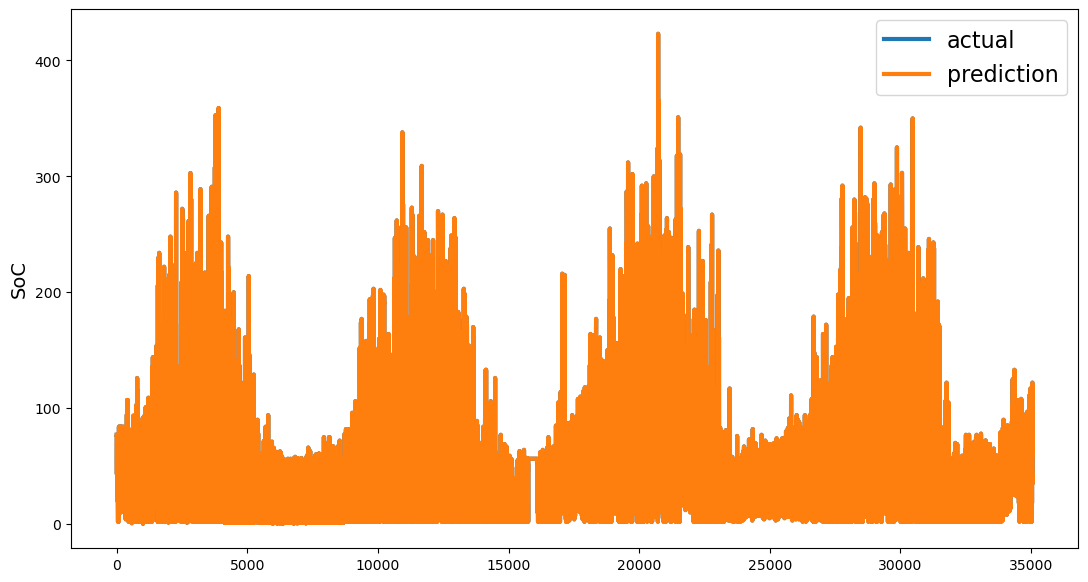

In [26]:
line_plot(y1, y_preddt1, 'actual', 'prediction', lw=3)

In [27]:
print("Mean Absolute Error:\n")
print(mean_absolute_error(y_preddt1, y1))

Mean Absolute Error:

6.601113044776977e-14


In [28]:
MSE = mean_squared_error(y_preddt1, y1)
print("Mean Squared Error:\n")
print(MSE)
RMSE = math.sqrt(MSE)
print("Root Mean Square Error:\n")
print(RMSE)
r2 = r2_score(y_preddt1, y1)
print('r2 score for this model is', r2)

Mean Squared Error:

1.2359169293525833e-26
Root Mean Square Error:

1.1117180080184828e-13
r2 score for this model is 1.0


In [29]:
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)
regressor.fit(X, y)

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_12240\1637975338.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.fit(X, y)


RandomForestRegressor(random_state=0)

In [30]:
y_prednb  =  regressor.predict(test_data)
y_prednb = y_prednb.reshape(-1, 1)
y_prednb = sc_y.inverse_transform(y_prednb) 
print(y_prednb)

[[137.96136   ]
 [ 15.644518  ]
 [153.        ]
 [153.        ]
 [ 71.105662  ]
 [ 64.463158  ]
 [ 56.35335841]
 [ 56.35335841]
 [  0.218484  ]
 [  0.218484  ]
 [  0.218484  ]
 [  0.218484  ]
 [  6.83949   ]
 [ 56.35335841]
 [  0.216342  ]
 [  0.218484  ]
 [  0.218484  ]
 [  0.218484  ]
 [  0.218484  ]
 [  0.220626  ]
 [  0.218484  ]
 [  4.609584  ]
 [ 15.64666   ]
 [ 20.120766  ]
 [ 22.075452  ]
 [ 26.740836  ]
 [ 31.354006  ]
 [ 80.        ]
 [133.        ]
 [122.        ]
 [128.703306  ]
 [139.89808   ]
 [139.89808   ]
 [135.248742  ]
 [133.        ]
 [ 93.319206  ]
 [ 84.261408  ]
 [ 68.919534  ]
 [ 57.803744  ]
 [ 46.682748  ]
 [ 24.585876  ]
 [ 53.395486  ]
 [ 66.615308  ]
 [ 91.        ]
 [115.269754  ]
 [122.        ]
 [124.        ]
 [135.263736  ]
 [139.89808   ]
 [146.        ]
 [146.        ]
 [128.701164  ]
 [102.        ]
 [ 76.02296   ]
 [ 48.15402   ]
 [ 26.332424  ]
 [  8.323812  ]
 [ 17.993808  ]
 [  0.227052  ]
 [  0.218484  ]
 [ 56.35335841]
 [ 56.35335841]
 [ 56.35

In [31]:
y_prednb1 = regressor.predict(X)
y_prednb1 = y_prednb1.reshape(-1, 1)
y_prednb1 = sc_y.inverse_transform(y_prednb1) 

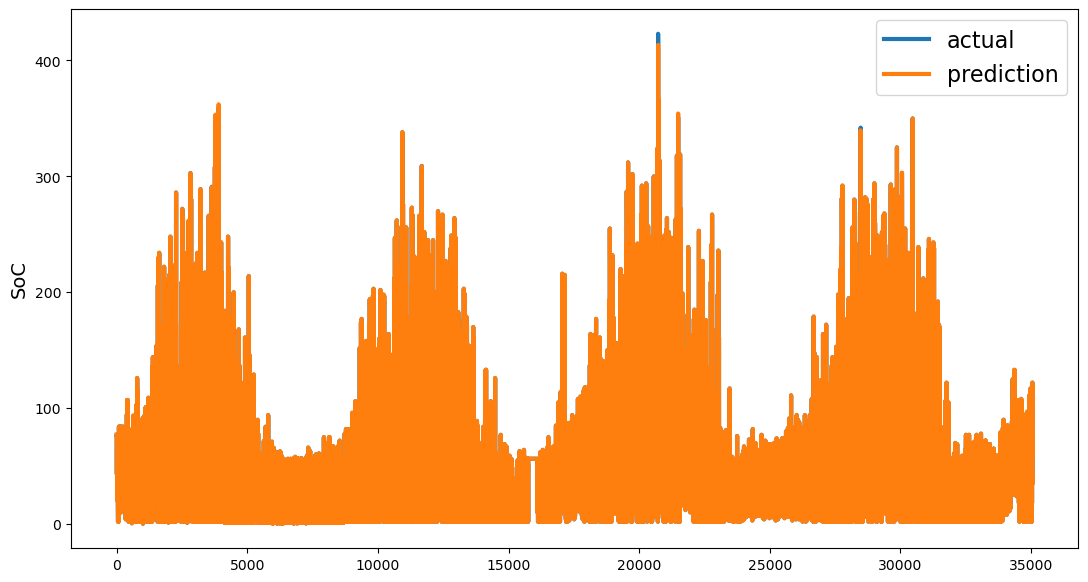

In [32]:
line_plot(y1, y_prednb1, 'actual', 'prediction', lw=3)

In [33]:
print("Mean Absolute Error:\n")
print(mean_absolute_error(y_prednb1, y1))

Mean Absolute Error:

0.002244185399148854


In [34]:
MSE = mean_squared_error(y_prednb1, y1)
print("Mean Squared Error:\n")
print(MSE)
RMSE = math.sqrt(MSE)
print("Root Mean Square Error:\n")
print(RMSE)
r2 = r2_score(y_prednb1, y1)
print('r2 score for this model is', r2)

Mean Squared Error:

0.004500503336559568
Root Mean Square Error:

0.06708579086930085
r2 score for this model is 0.9999985889667736


In [35]:
logreg = LinearRegression()
logreg.fit(X, y)

LinearRegression()

In [36]:
y_predlog =  logreg.predict(test_data)
y_predlog = y_predlog.reshape(-1, 1)
y_predlog = sc_y.inverse_transform(y_predlog) 
print(y_predlog)

[[137.50719782]
 [ 15.74163866]
 [153.00463262]
 [153.00463262]
 [ 71.0896201 ]
 [ 64.44786233]
 [ 56.35335841]
 [ 56.35335841]
 [ -8.61147317]
 [-10.82539242]
 [-19.68106945]
 [-10.82539242]
 [  6.88596164]
 [ 56.35335841]
 [-28.53674648]
 [-28.53674648]
 [-28.53674648]
 [-28.53674648]
 [-28.53674648]
 [-28.53674648]
 [-10.82539242]
 [  4.67204238]
 [ 15.74163866]
 [ 20.16947718]
 [ 22.38339644]
 [ 26.81123495]
 [ 31.23907347]
 [ 79.94529713]
 [133.0793593 ]
 [122.00976302]
 [128.65152079]
 [139.72111707]
 [139.72111707]
 [135.29327856]
 [133.0793593 ]
 [ 93.22881267]
 [ 84.37313564]
 [ 68.87570084]
 [ 57.80610455]
 [ 46.73650827]
 [ 24.59731569]
 [ 53.37826604]
 [ 66.66178158]
 [ 91.01489341]
 [115.36800524]
 [122.00976302]
 [124.22368227]
 [135.29327856]
 [139.72111707]
 [146.36287485]
 [146.36287485]
 [128.65152079]
 [102.0844897 ]
 [ 76.10636113]
 [ 48.12729234]
 [ 26.31310312]
 [  8.29268593]
 [ 17.95555792]
 [-16.84105383]
 [-31.54192048]
 [ 56.35335841]
 [ 56.35335841]
 [ 56.35

In [37]:
y_predlog1 = logreg.predict(X)
y_predlog1 = y_predlog1.reshape(-1, 1)
y_predlog1 = sc_y.inverse_transform(y_predlog1)

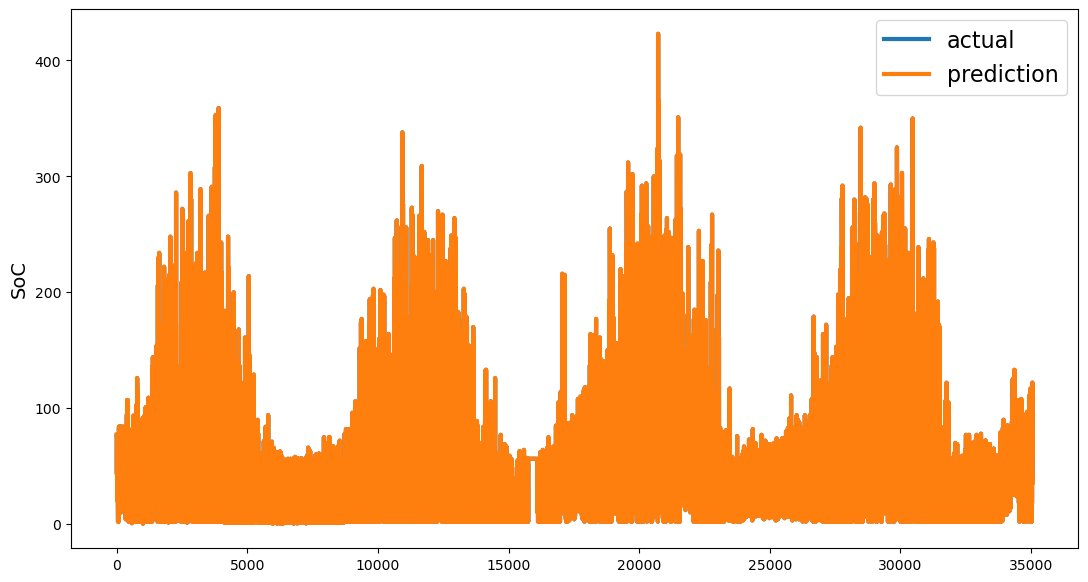

In [38]:
line_plot(y1, y_predlog1, 'actual', 'prediction', lw=3)

In [39]:
print("Mean Absolute Error:\n")
print(mean_absolute_error(y_predlog1, y1))

Mean Absolute Error:

6.098733959858071e-14


In [40]:
MSE = mean_squared_error(y_predlog1, y1)
print("Mean Squared Error:\n")
print(MSE)
RMSE = math.sqrt(MSE)
print("Root Mean Square Error:\n")
print(RMSE)
r2 = r2_score(y_predlog1, y1)
print('r2 score for this model is', r2)

Mean Squared Error:

5.514430738116296e-27
Root Mean Square Error:

7.425921315309162e-14
r2 score for this model is 1.0
